# Data Science Blog Post Project

This notebook contains the code and analysis for two datasets using CRISP-DM metodology.


This is the link to the Blog Post:
https://vasildatascience.wordpress.com


CRISP-DM Process (Cross Industry Process for Data Mining)


1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy



<br>
For CRISP-DM reference:

https://www.sv-europe.com/crisp-dm-methodology/

https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining

## The first two steps of CRISP-DM

### 1. Business Understanding

What problem we are trying to solve and what questtions we will answer. Here is what we will try to achive.

We will get hands on practice with few datasets from www.kaggle.com. By looking at the columns we can get tons of questions. I will go over 3 question and find the answers using CRISP-DM Process. The same process should be able to answer more questions and differnt datasets. 

**<font color='red'>Question1: </font>Where is more expensive - Boston or Seattle to have a vacation**

**<font color='red'>Question2: </font>What are the busiest days and what time is best to go - more rental options**

**<font color='red'>Question3: </font>Create model for rental price prediction**

### 2. Data Understanding

After Business Understanding we need to move to the data. We might need to collect or already have it collected. The data is already presented in our case and we will just use it for our analysis.

Datasets used:

**Boston, MA, USA Airbnb Open Data** - listing activity of homestays in Boston, MA. You can find the datasets used from the following link:  https://www.kaggle.com/airbnb/boston

**Seattle, WA, USA  Airbnb Open Data** - listing activity of homestays in Seattle, WA. You can find the datasets used from the following link: https://www.kaggle.com/airbnb/seattle/


 Information about the datasets:
 - Calendar (calendar.csv) -  includes listing id and the price and availability for that day
 - Listings (listings.csv) - includes full descriptions and average review score
 - Reviews (reviews.csv) - includes unique id for each reviewer and detailed comments 


#### First we will import the necessary libraries. Always put this on the top of your code/file. 

For more information:
https://docs.python.org/3/faq/programming.html#what-are-the-best-practices-for-using-import-in-a-module 

In [161]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

#### Let's read in the data

In [162]:
#Loading Boston Datasets
df_b_cal = pd.read_csv('./boston/calendar.csv')
df_b_list = pd.read_csv('./boston/listings.csv')
df_b_rev = pd.read_csv('./boston/reviews.csv')

In [163]:
#Loading Seattle Datasets
df_s_cal = pd.read_csv('./seattle/calendar.csv')
df_s_list = pd.read_csv('./seattle/listings.csv')
df_s_rev = pd.read_csv('./seattle/reviews.csv')

Lets use Pandas head() function to virify first 5 rows for the object based on position. It will help for quickly testing and if we have the right type of data.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.head.html

In [164]:
#Boston data verification  - calendar.csv
df_b_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [165]:
df_b_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [183]:
#Seattle data verification  - calendar.csv
df_s_cal.head()

,date,available,price,day,month
0,2016-01-04,t,85.0,4,1
1,2016-01-05,t,85.0,5,1
2,2016-01-06,f,NaN,6,1
3,2016-01-07,f,NaN,7,1
4,2016-01-08,f,NaN,8,1


In [185]:
df_s_cal.dtypes

date         datetime64[ns]
available            object
price               float64
day                   int64
month                 int64
dtype: object

In [166]:
#Function for converting 'date' to datetime64 type and 'price' to float64, then creating visualisation for how prices
#are going based on day/month of the year

def clean_astype_date(df, price_per_day, price_per_month):
    df["date"] = df["date"].astype("datetime64")
    df= df[df.columns[1:]].replace('[\$,]', '', regex=True)
    df['price'] = df['price'].astype('float64')
    
    df['day'] = df['date'].map(lambda x: x.timetuple().tm_yday)
    df['month'] = df['date'].map(lambda x: x.timetuple().tm_mon)
    
    # Average price per day of the year
    price_per_day = df.drop(['month'],axis=1).groupby('day').mean()
    # Average price per month of the year
    price_per_month = df.drop(['day'],axis=1).groupby('month').mean()
    
    return df, price_per_day, price_per_month

    

In [167]:
#Boston
df_b_cal, price_per_day_b, price_per_month_b  = clean_astype_date(df_b_cal, price_per_day_b, price_per_month_b)

In [168]:
#Seattle
df_s_cal, price_per_day_s, price_per_month_s  = clean_astype_date(df_s_cal, price_per_day_s, price_per_month_s)

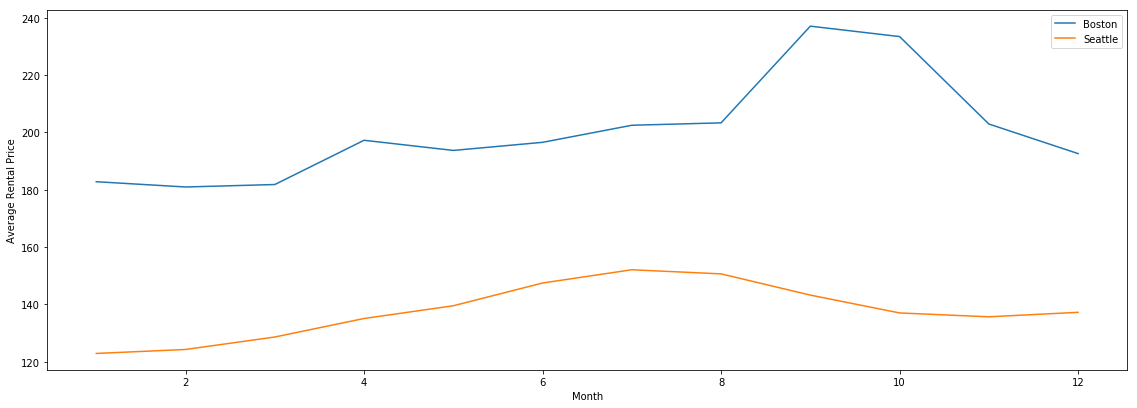

In [169]:
#Visualisation for how prices are changing based on month of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(price_per_month_b['price'], label='Boston')
ax.plot(price_per_month_s['price'], label='Seattle')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Average Rental Price');

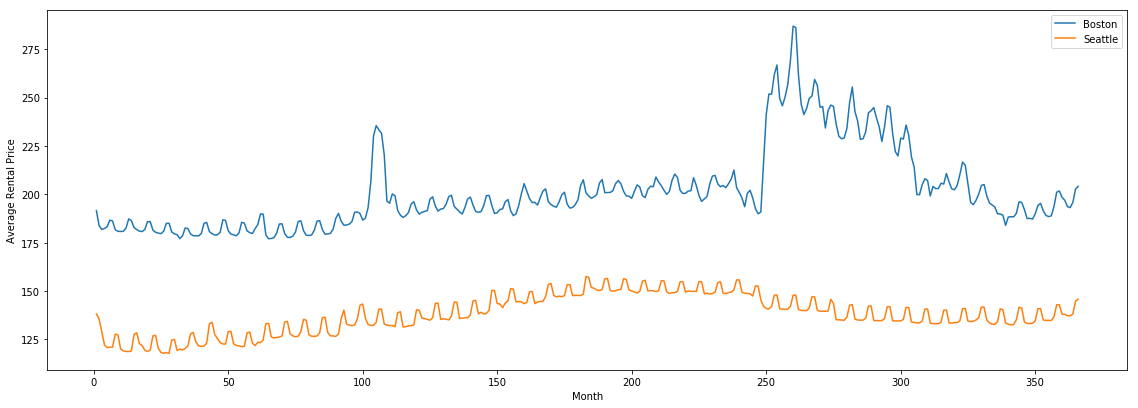

In [170]:
#Visualisation for how prices are changing based on day of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(price_per_day_b['price'], label='Boston')
ax.plot(price_per_day_s['price'], label='Seattle')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Average Rental Price');

In [171]:
# Google: The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. The "median" is the "middle" value in the list of numbers

print('In Boston mean price is ${}'.format(int(df_b_cal['price'].mean())))
print('In Boston median price is ${}'.format(int(df_b_cal['price'].median())))

In Boston mean price is $198
In Boston median price is $150


In [172]:
# Google: The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. The "median" is the "middle" value in the list of numbers

print('In Boston mean price is ${}'.format(int(df_s_cal['price'].mean())))
print('In Boston median price is ${}'.format(int(df_s_cal['price'].median())))

In Boston mean price is $137
In Boston median price is $109


In [173]:
#Boston - availability per month
available_per_month_b = df_b_cal.drop(['day','price','date'],axis=1)
available_per_month_b = pd.get_dummies(available_per_month_b, columns = ['available'])
available_per_month_b = available_per_month_b.drop(['available_f'],axis=1).groupby('month').mean()

#Seattle - availability per month
available_per_month_s = df_s_cal.drop(['day','price','date'],axis=1)
available_per_month_s = pd.get_dummies(available_per_month_s, columns = ['available'])
available_per_month_s = available_per_month_s.drop(['available_f'],axis=1).groupby('month').mean()

In [177]:
#Seattle - availability per day
available_per_day_b = df_b_cal.drop(['month','price','date'],axis=1)
available_per_day_b = pd.get_dummies(available_per_day_b, columns = ['available'])
available_per_day_b = available_per_day_b.drop(['available_f'],axis=1).groupby('day').mean()

#Seattle - availability per day
available_per_day_s = df_s_cal.drop(['month','price','date'],axis=1)
available_per_day_s = pd.get_dummies(available_per_day_s, columns = ['available'])
available_per_day_s = available_per_day_s.drop(['available_f'],axis=1).groupby('day').mean()

# the above should be a function due to the repetotitve code 

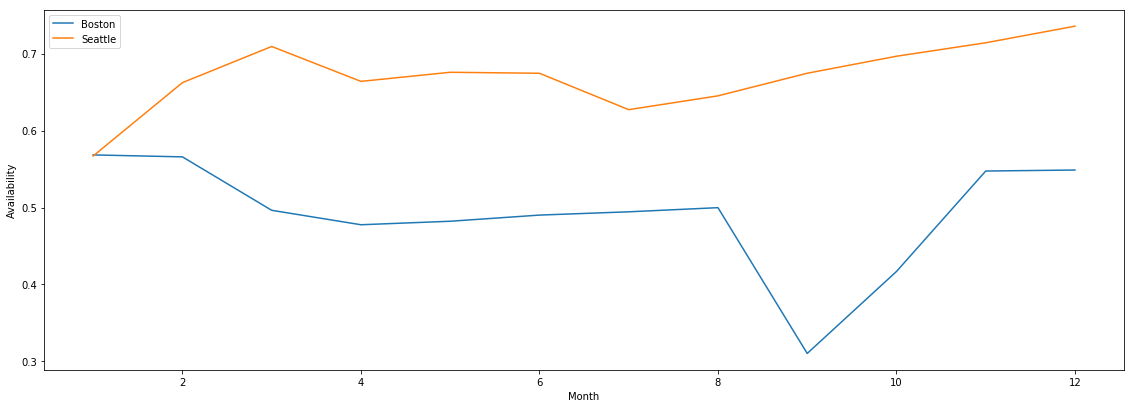

In [175]:
#Visualisation for how availability is changing based on month of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(available_per_month_b['available_t'], label='Boston')
ax.plot(available_per_month_s['available_t'], label='Seattle')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Availability');

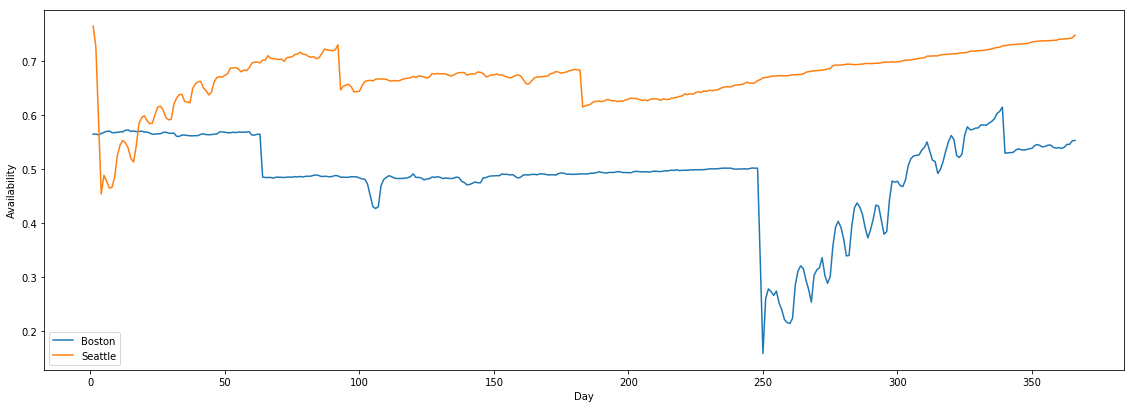

In [176]:
#Visualisation for how availability is changing based on day of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(available_per_day_b['available_t'], label='Boston')
ax.plot(available_per_day_s['available_t'], label='Seattle')
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Availability');

#### Another type of visualistaion which shows overal availability per city

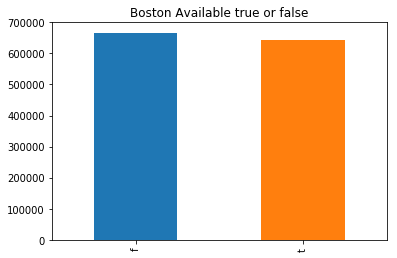

In [192]:
price101_x = df_b_cal.available.value_counts()
price101_x.plot(kind="bar");
plt.title("Boston Available true or false");

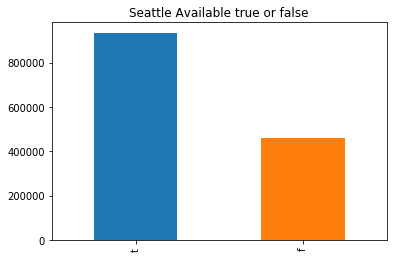

In [193]:
price101_x = df_s_cal.available.value_counts()
price101_x.plot(kind="bar");
plt.title("Seattle Available true or false");

In [178]:
#Boston data verification - listings.csv
df_b_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [194]:
#Boston find all columns which include 'price' - listings.csv
print(df_b_list.filter(like='price').columns)

Index(['price', 'weekly_price', 'monthly_price'], dtype='object')


In [195]:
#Boston data verification - reviews.csv
df_b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [197]:
#Seattle data verification - listings.csv
df_s_list.head().head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [198]:
#Seattle find all columns which include 'price' - listings.csv
print(df_s_list.filter(like='price').columns)

Index(['price', 'weekly_price', 'monthly_price'], dtype='object')


In [200]:
#Boston data verification - reviews.csv
df_b_rev.head().head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [201]:
#Seattle data verification - reviews.csv
df_s_rev.head().head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Let's find the number of rows and columns in each dataset

In [202]:
datasets = [df_b_cal, df_b_list, df_b_rev, df_s_cal, df_s_list, df_s_rev]

for i in datasets:
    print("Dataset:", [x for x in globals() if globals()[x] is i][0]) #Name of the dataset
    print("Number of rows in the dataset:",i.shape[0]) #Number of rows in the dataset
    print("Number of columns in the dataset:",i.shape[1]) #Number of columns in the dataset
    print('\n')


Dataset: df_b_cal
Number of rows in the dataset: 1308890
Number of columns in the dataset: 5


Dataset: df_b_list
Number of rows in the dataset: 3585
Number of columns in the dataset: 95


Dataset: df_b_rev
Number of rows in the dataset: 68275
Number of columns in the dataset: 6


Dataset: df_s_cal
Number of rows in the dataset: 1393570
Number of columns in the dataset: 5


Dataset: df_s_list
Number of rows in the dataset: 3818
Number of columns in the dataset: 92


Dataset: df_s_rev
Number of rows in the dataset: 84849
Number of columns in the dataset: 6




#### From the output above we see that in the Listings datasets for Boston and Seattle there are  differents in the columns. Let's find out what are the differences.

In [203]:
#Obtain all the column names in Boston Listings dataset
list_b_columns = list(df_b_list.columns.values)

In [204]:
#Obtain all the column names in Seattle Listings dataset
list_s_columns = list(df_s_list.columns.values)

In [205]:
#Find the delta  in the columns

col_diff = [i for i in list_b_columns if i not in list_s_columns]
 
print(col_diff) 

['access', 'interaction', 'house_rules']


#### Which columns are without missing values? 

In [206]:
no_nulls = set(df_s_cal.columns[df_s_cal.isnull().mean() == 0])#Provide a set of columns with 0 missing values.
no_nulls 

{'available', 'date', 'day', 'month'}

#### Which columns are with the most missing values? 

In [207]:
tet = df_s_rev.isnull().mean().sort_values(ascending = False)

tet

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

**What proportion of the all listings in the dataset reported a Price**

In [208]:
prop_b_price = df_b_cal.notnull()['price'].mean() #Boston
#prop_b_price = 1 - df_b_cal.isnull()['price'].mean() #Boston
prop_b_price

0.4912842179251121

In [209]:
#prop_s_price = df_s_cal.notnull()['price'].mean() #Seattle
prop_s_price = 1 - df_s_cal.isnull()['price'].mean()
prop_s_price

0.6706100160020667

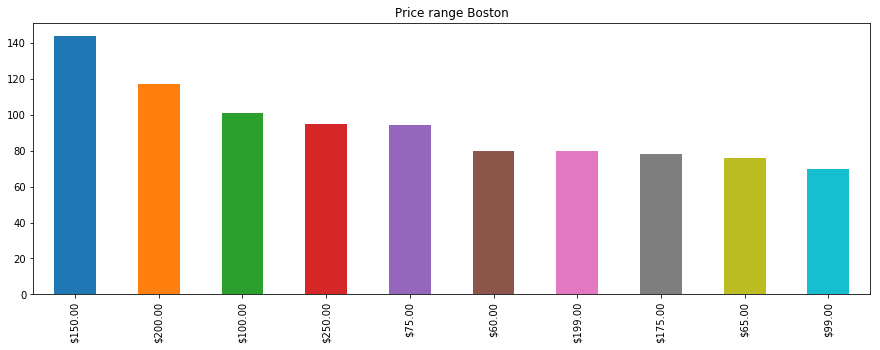

In [212]:
price10_b = df_b_list.price.value_counts().head(10)
#price10_b = df_b_cal.price.value_counts().head(10)
price10_b.plot(kind="bar");
plt.title("Price range Boston");
plt.rcParams["figure.figsize"] = (15,5);

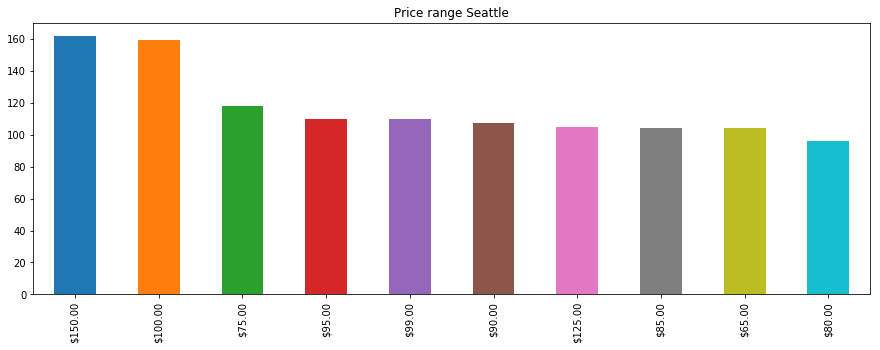

In [213]:
price10_s = df_s_list.price.value_counts().head(10)
#price10_s = df_s_cal.price.value_counts().head(10)
price10_s.plot(kind="bar");
plt.title("Price range Seattle");
plt.rcParams["figure.figsize"] = (15,5);

### From the plots above based on the listing prices we can clearly see that Boston is more expensive destination.

In [214]:
#Lets Find all categorical and numerical values for Boston and Seattle

def cat_and_num_val(datasets):
    for col in datasets:
        print("Dataset:", [x for x in globals() if globals()[x] is col][0]) #Name of the dataset)
        print("Numerical columns: ", col.select_dtypes(include=['int', 'float']).columns)
        print("Categorical columns ", col.select_dtypes(include=['category', object]).columns)
        print('\n')

cat_and_num_val(datasets)

Dataset: df_b_cal
Numerical columns:  Index(['price', 'day', 'month'], dtype='object')
Categorical columns  Index(['available'], dtype='object')


Dataset: df_b_list
Numerical columns:  Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')
Categorical columns  Index(['listing_url', 'last_scraped', 'name',

### Strep 3 Prepare Data

#### We can now look at the third step of the process

We have already the data collected for us. We still need to wrangle the data in sach a way that we can get the answers of the questions we are looking for. 

The wrangling and cleaning process takes majority of time and can be 80% of the all analysis process. 


In [215]:
df_b_cal['available'].value_counts()/df_s_cal.shape[0]

f    0.477804
t    0.461431
Name: available, dtype: float64

In [216]:
df_s_cal['available'].value_counts()/df_s_cal.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

In [217]:
df_b_cal['price'].isnull().mean() # missing values

0.5087157820748879

In [218]:
df_s_cal['price'].isnull().mean() # missing values

0.32938998399793334

In [219]:
df_s_cal['available'].isnull().mean() # missing values

0.0

In [220]:
df_b_cal['available'].isnull().mean() # missing values

0.0

In [222]:
#df_b_cal.groupby(['price']).mean()['listing_id'].sort_values()

Remove the Rows associated with missing values in Price(only we care about tne missing values in 'price')

In [223]:
price_b_rm_nan = df_b_cal.dropna(subset=['price'], axis=0) #Boston
price_s_rm_nan = df_s_cal.dropna(subset=['price'], axis=0) #Seattle


In [224]:
#Boston remove $ sign
price_b_rm_nan = price_b_rm_nan[price_b_rm_nan.columns[1:]].replace('[\$,]', '', regex=True)
#Seattle  remove $ sign
price_s_rm_nan = price_s_rm_nan[price_s_rm_nan.columns[1:]].replace('[\$,]', '', regex=True)

In [225]:
# convert to float
price_b_rm_nan['price'] = price_b_rm_nan['price'].astype('float64')
price_s_rm_nan['price'] = price_s_rm_nan['price'].astype('float64')

In [226]:
price_b_rm_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
available    643037 non-null object
price        643037 non-null float64
day          643037 non-null int64
month        643037 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.5+ MB


In [227]:
price_b_rm_nan.describe()

,price,day,month
count,643037.000000,643037.000000,643037.000000
mean,198.438909,179.008152,6.384160
std,180.142913,109.095294,3.557195
min,11.000000,1.000000,1.000000
25%,85.000000,82.000000,3.000000
50%,150.000000,175.000000,6.000000
75%,255.000000,279.000000,10.000000
max,7163.000000,366.000000,12.000000


In [228]:
price_s_rm_nan.describe()

,price,day,month
count,934542.000000,934542.000000,934542.000000
mean,137.944859,188.110623,6.661120
std,105.062870,105.442146,3.446401
min,10.000000,1.000000,1.000000
25%,75.000000,96.000000,4.000000
50%,109.000000,187.000000,7.000000
75%,160.000000,281.000000,10.000000
max,1650.000000,366.000000,12.000000


**From the above boston seems to be more expensive**

In [229]:
#Will convert 'price', 'weekly_price', 'monthly_price' to numerical and will try to predict Price

#Boston remove $ sign
df_b_list_new = df_b_list[df_b_list.columns[1:]].replace('[\$,]', '', regex=True)
#Seattle  remove $ sign
df_s_list_new = df_s_list[df_s_list.columns[1:]].replace('[\$,]', '', regex=True)

# convert to float
df_b_list_new['price'] = df_b_list_new['price'].astype('float64')
df_s_list_new['price'] = df_s_list_new['price'].astype('float64')
df_b_list_new['weekly_price'] = df_b_list_new['price'].astype('float64')
df_s_list_new['weekly_price'] = df_s_list_new['price'].astype('float64')
df_b_list_new['monthly_price'] = df_b_list_new['price'].astype('float64')
df_s_list_new['monthly_price'] = df_s_list_new['price'].astype('float64')

list_new_df = [df_b_list_new, df_s_list_new]

cat_and_num_val(list_new_df)

Dataset: df_b_list_new
Numerical columns:  Index(['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'weekly_price', 'monthly_price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')
Categorical columns  Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',


<Figure size 1440x1440 with 0 Axes>

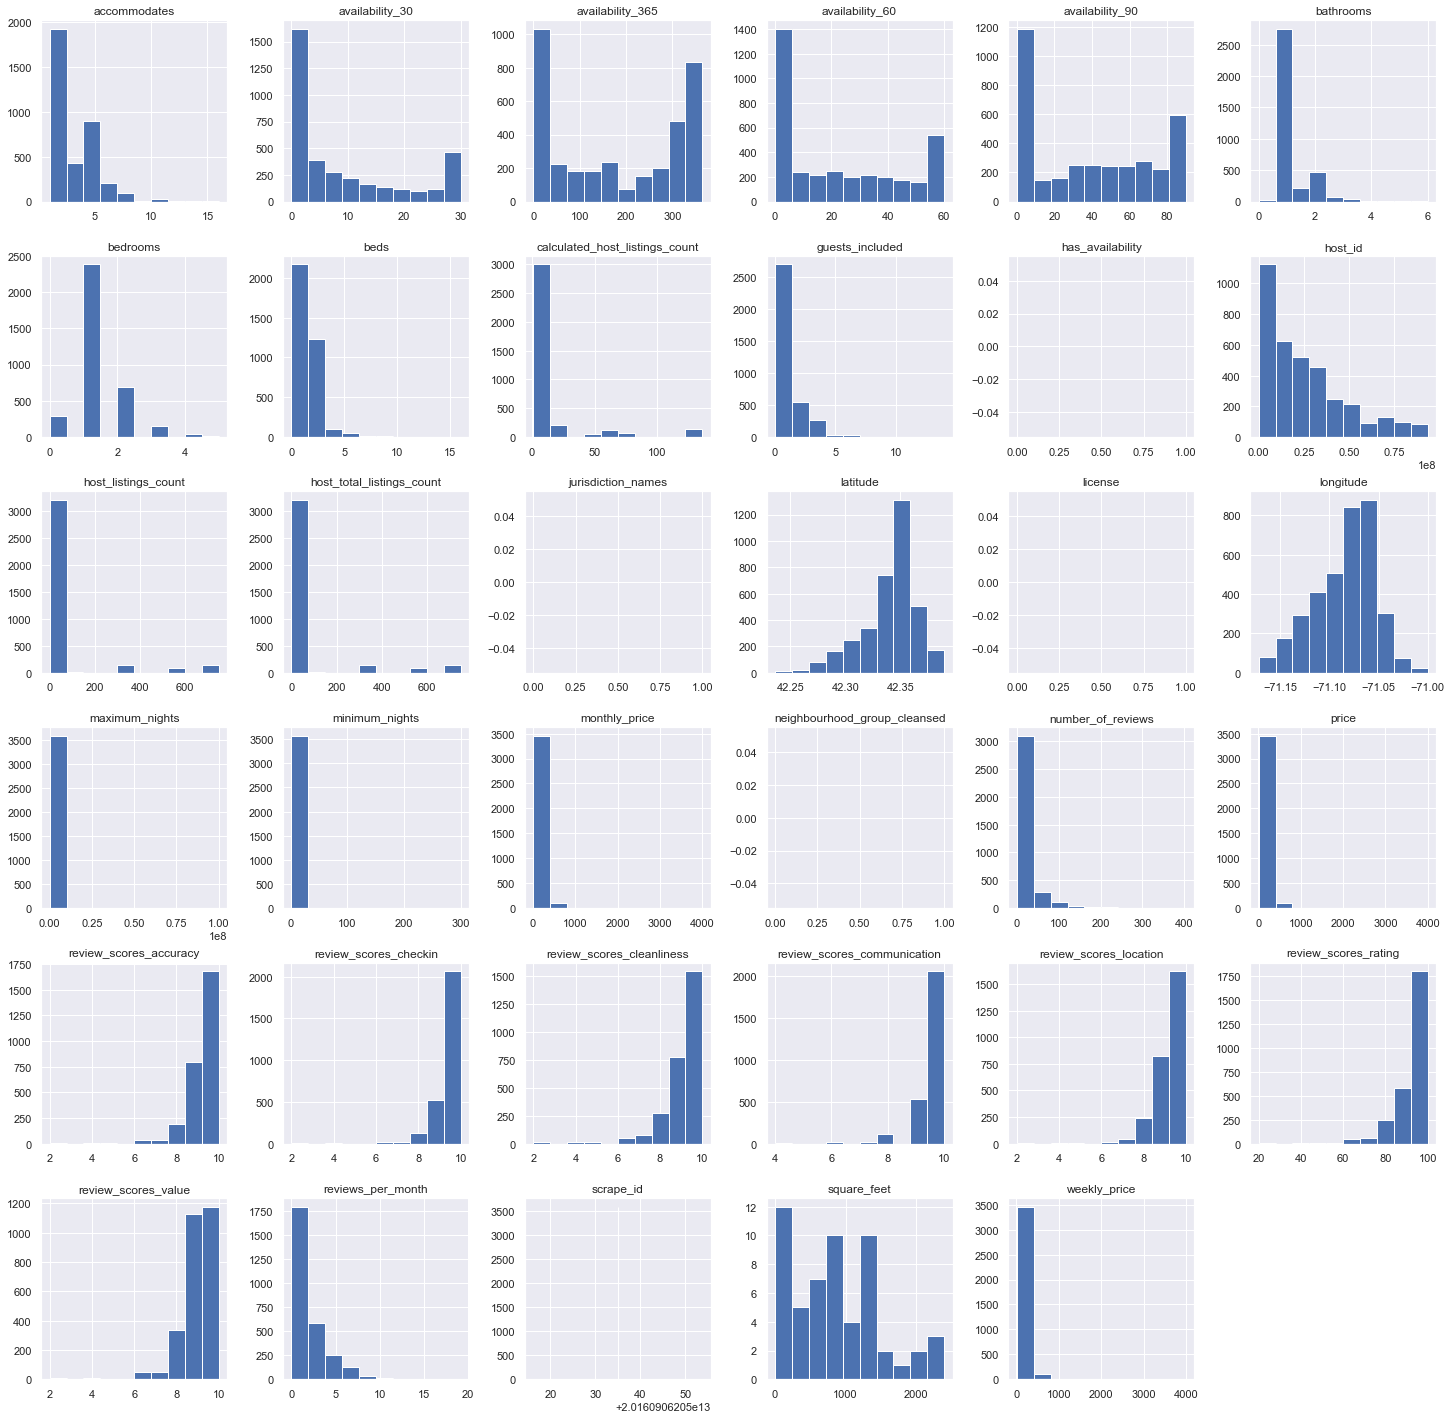

In [235]:
# we can answer more questions also from a quick look below for both cities
# like where properties are bigger based (more bathrooms/bedrooms for example)
# also avaalability - Boston looks like less available for renting

fig = plt.figure(figsize = (20,20))
df_b_list_new.hist();

<Figure size 1440x1440 with 0 Axes>

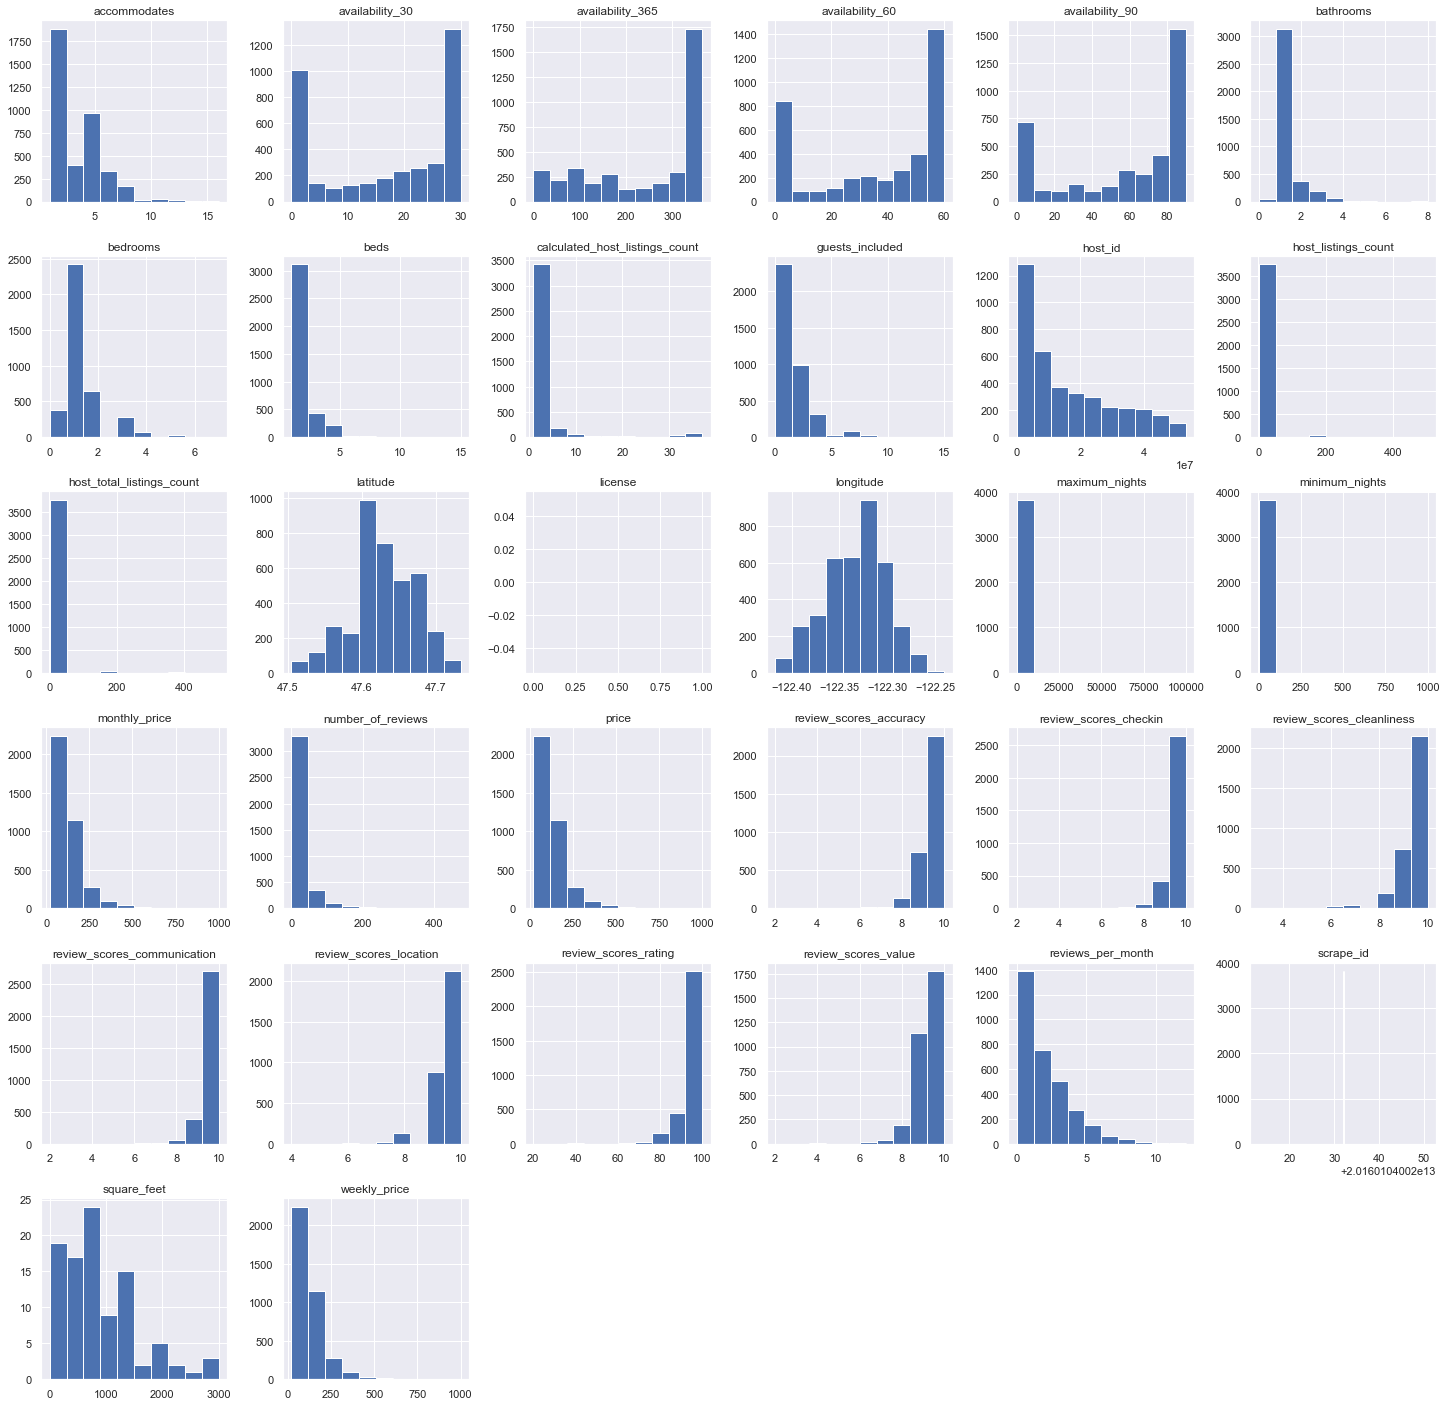

In [236]:
fig = plt.figure(figsize = (20,20))
df_s_list_new.hist();

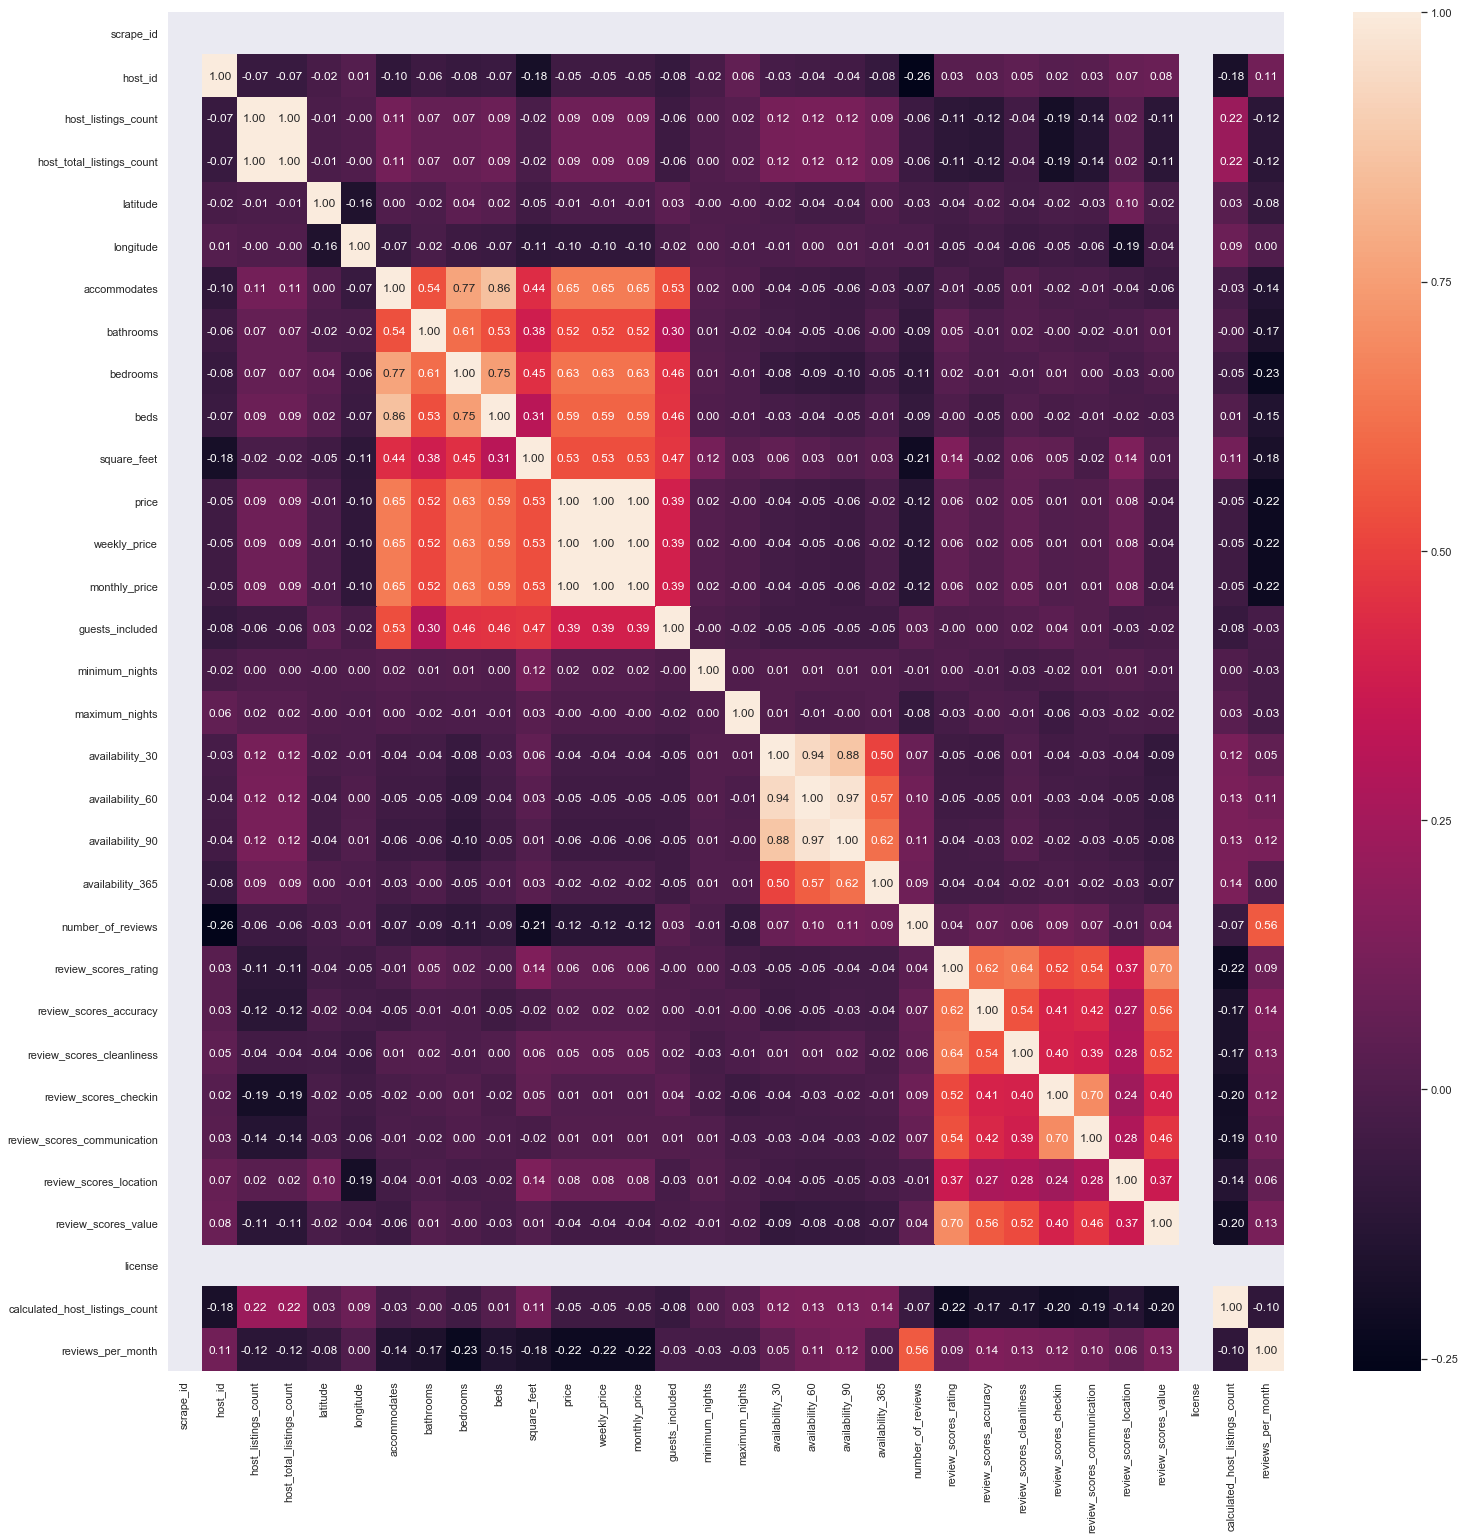

In [237]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df_s_list_new.corr(), annot=True, fmt=".2f");

In [238]:
#find NaN Boston for all. If more than 60% drop , if less than 60% impute
df_b_list_new.isnull().mean().sort_values(ascending=False) # missing values

has_availability                    1.000000
neighbourhood_group_cleansed        1.000000
jurisdiction_names                  1.000000
license                             1.000000
square_feet                         0.984379
security_deposit                    0.625662
notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
review_scores_accuracy              0.229568
review_scores_location              0.229289
review_scores_value                 0.229010
review_scores_checkin               0.228731
review_scores_cleanliness           0.228173
review_scores_communication         0.228173
review_scores_rating                0.226778
reviews_pe

In [239]:
#find NaN Seattle for all. If more than 60% drop , if less than 60% impute
df_s_list_new.isnull().mean().sort_values(ascending=False) # missing values

license                             1.000000
square_feet                         0.974594
security_deposit                    0.511262
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
last_review                         0.164222
first_review                        0.164222
reviews_per_month                   0.164222
space                               0.149031
host_response_time                  0.136983
host_response_rate                  0.136983
neighbourh

In [240]:
#Boston: Set of columns with more than 60% of NaN

top_miss_val_b = set(df_b_list_new.columns[df_b_list_new.isnull().mean() > 0.60])
top_miss_val_b

{'has_availability',
 'jurisdiction_names',
 'license',
 'neighbourhood_group_cleansed',
 'security_deposit',
 'square_feet'}

In [241]:
#Seattle: Set of columns with more than 60% of NaN

top_miss_val_s = set(df_s_list_new.columns[df_s_list_new.isnull().mean() > 0.60])
top_miss_val_s

{'license', 'square_feet'}

In [242]:
#Dropping the columns with more than 60% missing values for Boston
for col in top_miss_val_b:
    df_b_list_new = df_b_list_new.drop([col], axis=1)

In [243]:
#Dropping the columns with more than 60% missing values for Seattle
for col in top_miss_val_s:
    df_s_list_new = df_s_list_new.drop([col], axis=1)

In [244]:
#check if columns in 'top_miss_val_b' get dropped
top_miss_val_b = set(df_b_list_new.columns[df_b_list_new.isnull().mean() > 0.50])
top_miss_val_b

{'notes'}

In [245]:
#check if columns in 'top_miss_val_s' get dropped
top_miss_val_s = set(df_s_list_new.columns[df_s_list_new.isnull().mean() > 0.50])
top_miss_val_s

{'security_deposit'}

#### I will try to predict with only numerical values. If the results are not good I will use the categorical features. 

#### Before doing this need to get rid of NaN. 


In [246]:
#Numerical columns Boston  - I removed colums with 100% NaN form here and price
df_b_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60',
       'availability_90', 'availability_365']

#Numerical columns Seattle - I removed colums with 100% NaN form here and price

df_s_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']


In [247]:
#Boston - Missing Values - different output 

for column in df_b_list_new:
    if df_b_list_new[column].isnull().any():
       print('Column [{0}] has {1} null values'.format(column, df_b_list_new[column].isnull().sum()))

Column [summary] has 143 null values
Column [space] has 1057 null values
Column [neighborhood_overview] has 1415 null values
Column [notes] has 1975 null values
Column [transit] has 1290 null values
Column [access] has 1489 null values
Column [interaction] has 1554 null values
Column [house_rules] has 1192 null values
Column [thumbnail_url] has 599 null values
Column [medium_url] has 599 null values
Column [xl_picture_url] has 599 null values
Column [host_location] has 11 null values
Column [host_about] has 1309 null values
Column [host_response_time] has 471 null values
Column [host_response_rate] has 471 null values
Column [host_acceptance_rate] has 471 null values
Column [host_neighbourhood] has 339 null values
Column [neighbourhood] has 543 null values
Column [city] has 2 null values
Column [zipcode] has 38 null values
Column [market] has 14 null values
Column [property_type] has 3 null values
Column [bathrooms] has 14 null values
Column [bedrooms] has 10 null values
Column [beds] 

In [248]:
#Boston - Missing Values - different output 

for column in df_s_list_new:
    if df_s_list_new[column].isnull().any():
       print('Column [{0}] has {1} null values'.format(column, df_s_list_new[column].isnull().sum()))

Column [summary] has 177 null values
Column [space] has 569 null values
Column [neighborhood_overview] has 1032 null values
Column [notes] has 1606 null values
Column [transit] has 934 null values
Column [thumbnail_url] has 320 null values
Column [medium_url] has 320 null values
Column [xl_picture_url] has 320 null values
Column [host_name] has 2 null values
Column [host_since] has 2 null values
Column [host_location] has 8 null values
Column [host_about] has 859 null values
Column [host_response_time] has 523 null values
Column [host_response_rate] has 523 null values
Column [host_acceptance_rate] has 773 null values
Column [host_is_superhost] has 2 null values
Column [host_thumbnail_url] has 2 null values
Column [host_picture_url] has 2 null values
Column [host_neighbourhood] has 300 null values
Column [host_listings_count] has 2 null values
Column [host_total_listings_count] has 2 null values
Column [host_has_profile_pic] has 2 null values
Column [host_identity_verified] has 2 null 

#use mean or median for imputing

In [249]:
#Prediction for Boston price
#Only use numerical variables and drop any rows with missing values

def model_func(df_model,num_list):
    X = df_model[num_list]
    X = X.groupby(X.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    #X = X.groupby(X.columns, axis = 1).transform(lambda x: x.fillna(x.median()))
    y = df_model['price']


    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=40) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))


In [250]:
#Prediction for Boston price
#Only numerical variables are used and droping any rows with missing values below

model_func(df_b_list_new,df_b_list_numerical_no_price)

The r-squared score for your model was 0.20406180348413427 on 1076 values.


####  R2=1 the model completely fit and explained all variance for Boston

In [251]:
#Prediction for Seattle price
#Only numerical variables are used and droping any rows with missing values below

model_func(df_s_list_new,df_s_list_numerical_no_price)

KeyError: "['square_feet'] not in index"

####  R2=1 the model completely fit and explained all variance for Boston

#### Categorical Variables

For better results we can include the categorical colums as they can provide a really good information

In [ ]:
#Boston Categorical columns
cat_df_b = df_b_list.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns
#cat_df_b
(np.sum(cat_df_b.isnull())/cat_df_b.shape[0]).sort_values(ascending = False)

In [ ]:
#for same categorical colums is ok to create dummmies but for others,
#in those dataset is challenging as we maight end up with more columns than rows

pd.get_dummies(df_b_list['cancellation_policy'])

In [ ]:
# pd.get_dummies(df_b_list['description'])
# pd.get_dummies(df_b_list['name'])
testdf = pd.get_dummies(df_b_list['neighbourhood'])


#### I decided to add the categorical columns  'cancellation_policy' and 'neighbourhood' and rerun the model

### Conclusion

Using CRISP-DM Process I was able to answer and visualize different questions and during this analysis you can come with more questions and answers very easy. Missing values and the categorical columns introduce complications. I decided to drop columns with more than 60% of missing values (as they are only few) and Impute the rest columns with the mean (I did try also with Median and get same results). For imouting I used pandas. Also tried to use the categorical values . This is something I think have to be tested with multiple variations as can lead to good results and also to Biased models. I would say the best will be to use functions so that different combinations can be easily utilized.

**Question1:** Where is more expensive - Boston is more expensive than Seattle for a vacation (you will pay more for the rent) 

**Question2:** What are the busiest days and what time is best to go - more rental options (weekends are more busy than the weekdays as this is expected I think)

**Question3:** Create model for rental price prediction - I creagted a prediction model using listings.csv dasatest for Boston and Seattle. I used mainly the numerical columns as they provided a good information.